# Analisi dati da TripAdvisor - Armani Hotel Milano

In [1]:
import pandas as pd

df = pd.read_csv('data/ArmaniHotelReviews.csv')

df.head(10)

,review_id,date_of_stay,review_rating,review_title,review_text
0,869387650,November 2022,5.0,I love this hotel,It is truly difficult to find a flaw in this h...
1,889405632,May 2023,5.0,Outstanding time at Armani in Milan,Fantastic experience at the Armani Hotel in Mi...
2,779338587,October 2020,5.0,Great Milano Hotel - Very Well Located,This hotel is all you expect from Armani. Desi...
3,837733277,May 2022,5.0,Thank you Lifestyle team,This hotel deserves a lot more than the flak r...
4,923971481,October 2023,5.0,Stylish Armani in stylish Milan,What an amazing stay! Totally stylish and such...
5,793435259,June 2021,5.0,Amazing....every time,"I love everything about the Armani hotel, one ..."
6,904077271,July 2023,3.0,First class team,The team at the Armani were amongst the best I...
7,797695140,July 2021,4.0,Everything is beautiful about this hotel excep...,The Hotel is a 'go-to' place with an amazing d...
8,837350044,April 2022,5.0,Enjoyable trip,It is not the first time we visit Milan but it...
9,815655696,October 2021,4.0,"Good location, sleek hotel",Very sleek hotel and impressive to see. The lo...


In [2]:
from datetime import datetime

#convertiamo la colonna date_of_stay in formato datetime e creiamo due nuove colonne Month e Year (quindi senza usare conversioni manuali del mese)
dates = pd.to_datetime(df['date_of_stay'], format='%B %Y')
df['Month'] = dates.dt.month
df['Year'] = dates.dt.year

df.head(10)

,review_id,date_of_stay,review_rating,review_title,review_text,Month,Year
0,869387650,November 2022,5.0,I love this hotel,It is truly difficult to find a flaw in this h...,11,2022
1,889405632,May 2023,5.0,Outstanding time at Armani in Milan,Fantastic experience at the Armani Hotel in Mi...,5,2023
2,779338587,October 2020,5.0,Great Milano Hotel - Very Well Located,This hotel is all you expect from Armani. Desi...,10,2020
3,837733277,May 2022,5.0,Thank you Lifestyle team,This hotel deserves a lot more than the flak r...,5,2022
4,923971481,October 2023,5.0,Stylish Armani in stylish Milan,What an amazing stay! Totally stylish and such...,10,2023
5,793435259,June 2021,5.0,Amazing....every time,"I love everything about the Armani hotel, one ...",6,2021
6,904077271,July 2023,3.0,First class team,The team at the Armani were amongst the best I...,7,2023
7,797695140,July 2021,4.0,Everything is beautiful about this hotel excep...,The Hotel is a 'go-to' place with an amazing d...,7,2021
8,837350044,April 2022,5.0,Enjoyable trip,It is not the first time we visit Milan but it...,4,2022
9,815655696,October 2021,4.0,"Good location, sleek hotel",Very sleek hotel and impressive to see. The lo...,10,2021


In [3]:
# controlliamo i dati caricati
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   review_id      740 non-null    int64  
 1   date_of_stay   740 non-null    object 
 2   review_rating  740 non-null    float64
 3   review_title   740 non-null    object 
 4   review_text    740 non-null    object 
 5   Month          740 non-null    int32  
 6   Year           740 non-null    int32  
dtypes: float64(1), int32(2), int64(1), object(3)
memory usage: 34.8+ KB


In [4]:
# convertiamo le colonne al tipo di dato più appropriato (str diventerà object quando chiameremo df.info())
df = df.astype({'review_id': 'str', 'date_of_stay': 'str', 'review_rating': 'float64', 'review_title': 'str', 'review_text': 'str', 'Month': 'category', 'Year': 'category'})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   review_id      740 non-null    object  
 1   date_of_stay   740 non-null    object  
 2   review_rating  740 non-null    float64 
 3   review_title   740 non-null    object  
 4   review_text    740 non-null    object  
 5   Month          740 non-null    category
 6   Year           740 non-null    category
dtypes: category(2), float64(1), object(4)
memory usage: 31.2+ KB


In [5]:
# statistiche descrittive delle colonne numeriche
df.describe()

,review_rating
count,740.000000
mean,4.627027
std,0.816822
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


## Analisi (qualche esempio)

In [ ]:
#serve per proprietà df.style
%pip install jinja2

In [7]:
# visualizzazione a matrice delle medie mensili delle recensioni per anno
def style_rating(r, lim):
    # funzione per colorare le celle in base al valore (limite 3.0)
    # rossa se sotto il limite, verde se sopra, nera se uguale
    return ('background-color:darkred;' if r < lim else 'background-color:darkgreen;' if r > lim else 'background-color:black;') + 'color:white'

mean = df['review_rating'].mean()
print('overall mean:', mean)

p = df.groupby(['Year', 'Month'], observed=False)['review_rating'].mean().unstack('Month')
p.style.map(lambda x: style_rating(x,3.0))

overall mean: 4.627027027027027


Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2011,nan,nan,nan,nan,nan,nan,5.000000,nan,nan,nan,3.000000,3.500000
2012,2.000000,nan,2.500000,3.666667,5.000000,5.000000,4.000000,4.285714,5.000000,4.714286,4.666667,4.666667
2013,4.666667,4.000000,4.500000,4.500000,3.750000,4.600000,4.500000,4.500000,4.250000,4.000000,2.000000,4.500000
2014,5.000000,5.000000,5.000000,4.333333,4.250000,4.833333,4.555556,4.714286,4.857143,4.545455,4.875000,4.666667
2015,4.750000,5.000000,4.750000,4.777778,4.846154,4.571429,4.333333,4.350000,4.857143,5.000000,4.857143,4.750000
2016,4.909091,4.727273,4.812500,4.400000,4.857143,5.000000,4.588235,4.857143,4.850000,4.800000,4.833333,5.000000
2017,5.000000,4.111111,5.000000,4.875000,4.875000,4.833333,4.500000,4.571429,4.785714,4.545455,4.727273,4.800000
2018,3.500000,4.000000,4.750000,4.666667,4.555556,4.250000,4.500000,5.000000,4.666667,5.000000,5.000000,4.555556
2019,5.000000,2.000000,5.000000,5.000000,5.000000,4.200000,4.000000,4.500000,4.800000,3.000000,3.000000,nan


<Axes: title={'center': 'Distribuzione delle recensioni'}, ylabel='Frequency'>

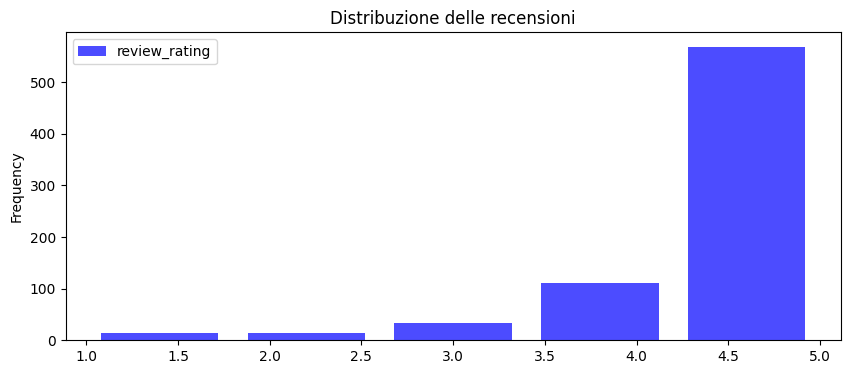

In [8]:
df.plot.hist(y='review_rating', bins=5, rwidth=0.8, color='blue', alpha=0.7, title='Distribuzione delle recensioni', figsize=(10,4))

Le opzioni sono limitate se cerchiamo solo i dati numerici.

In più, alcune righe sembrano incongruenti tra voto e recenzione:

In [9]:
df[df['review_id']=='904077271']

,review_id,date_of_stay,review_rating,review_title,review_text,Month,Year
6,904077271,July 2023,3.0,First class team,The team at the Armani were amongst the best I...,7,2023


voto 3, ma recenzione "First class team", "amongst the best..." sembra abbia poco senso.

Per analizzare meglio, bisognerebbe fare un po' di NLP (Natural Language Processing) sul testo delle recensioni.

In [10]:
%pip install nltk wordcloud

  Using cached click-8.3.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached regex-2025.9.18-cp312-cp312-win_amd64.whl.metadata (41 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 13.3 MB/s  0:00:00
Using cached regex-2025.9.18-cp312-cp312-win_amd64.whl (275 kB)
Using cached click-8.3.0-py3-none-any.whl (107 kB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)

   ---------------------------------------- 0/6 [tqdm]
   ------------- -------------------------- 2/6 [joblib]
   ------------- -------------------------- 2/6 [joblib]
   ------------- -------------------------- 2/6 [joblib]
   -------------------- ------------------- 3/6 [click]
   -------------------------- ------------- 4/6 [nltk]
   -------------------------- ------------

In [18]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

stop_words = []
stop_words.extend(stopwords.words('english'))
stop_words.extend(stopwords.words('italian'))
stop_words.extend(['hotel', 'room', 'armani', 'Milan'])

stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\WilliamRussell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

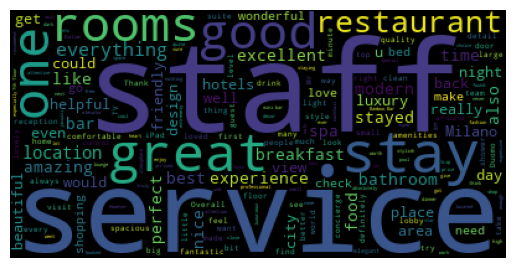

In [19]:
#sperimentiamo con WordCloud
from wordcloud import WordCloud

reviews = " ".join(review for review in df['review_text'])
word_cloud = WordCloud(stopwords=stop_words).generate(reviews)

import matplotlib.pyplot as plt
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [20]:
df_positivi = df[df['review_rating']>3.0] 
df_negativi = df[df['review_rating']<3.0] 

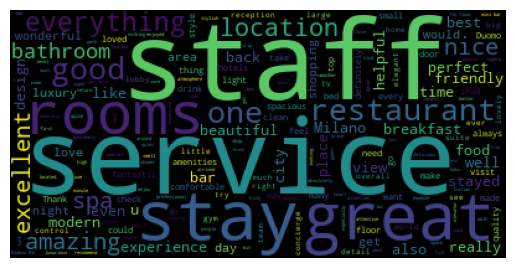

In [24]:

reviews = " ".join(review for review in df_positivi['review_text'])
word_cloud = WordCloud(stopwords=stop_words).generate(reviews)

import matplotlib.pyplot as plt
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

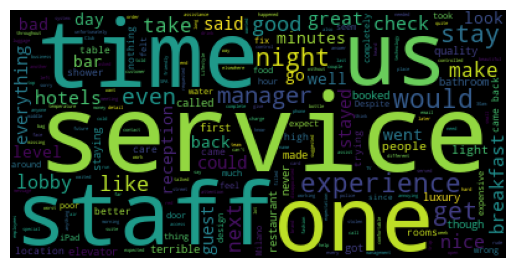

In [22]:

reviews = " ".join(review for review in df_negativi['review_text'])
word_cloud = WordCloud(stopwords=stop_words).generate(reviews)

import matplotlib.pyplot as plt
plt.imshow(word_cloud)
plt.axis("off")
plt.show()